In [39]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [22]:
df = pd.read_csv('../data/raw/DiseaseAndSymptoms.csv')

In [23]:
symptoms = df.iloc[:, 1:].apply(lambda x: list(x.dropna().values), axis=1)

In [24]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(symptoms)
symptom_names = mlb.classes_

In [25]:
le = LabelEncoder()
y = le.fit_transform(df['Disease'])

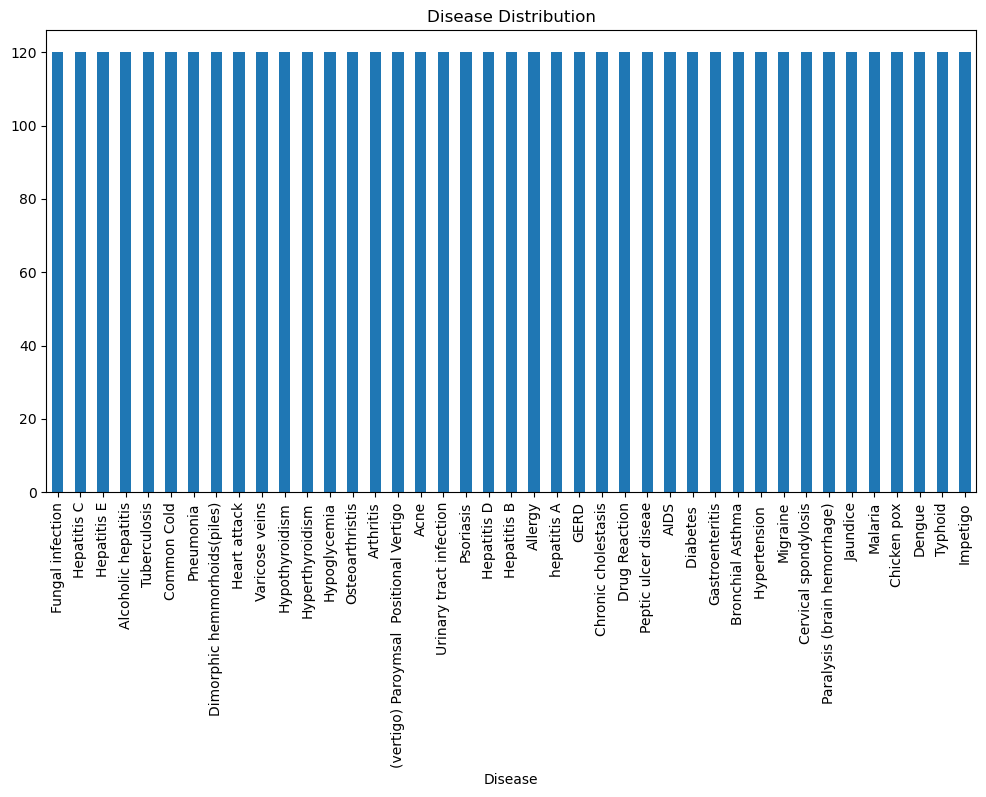

In [26]:
plt.figure(figsize=(12, 6))
df['Disease'].value_counts().plot(kind='bar')
plt.title('Disease Distribution')
plt.show()

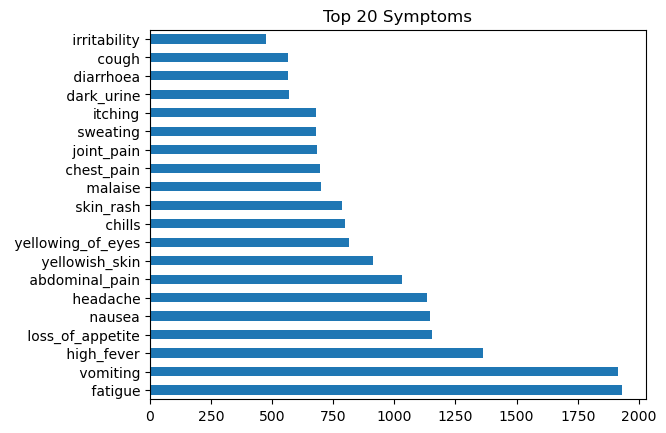

In [27]:
symptom_counts = pd.Series(X.sum(axis=0), index=symptom_names)
symptom_counts.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Top 20 Symptoms')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)

Accuracy: 1.00
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
            

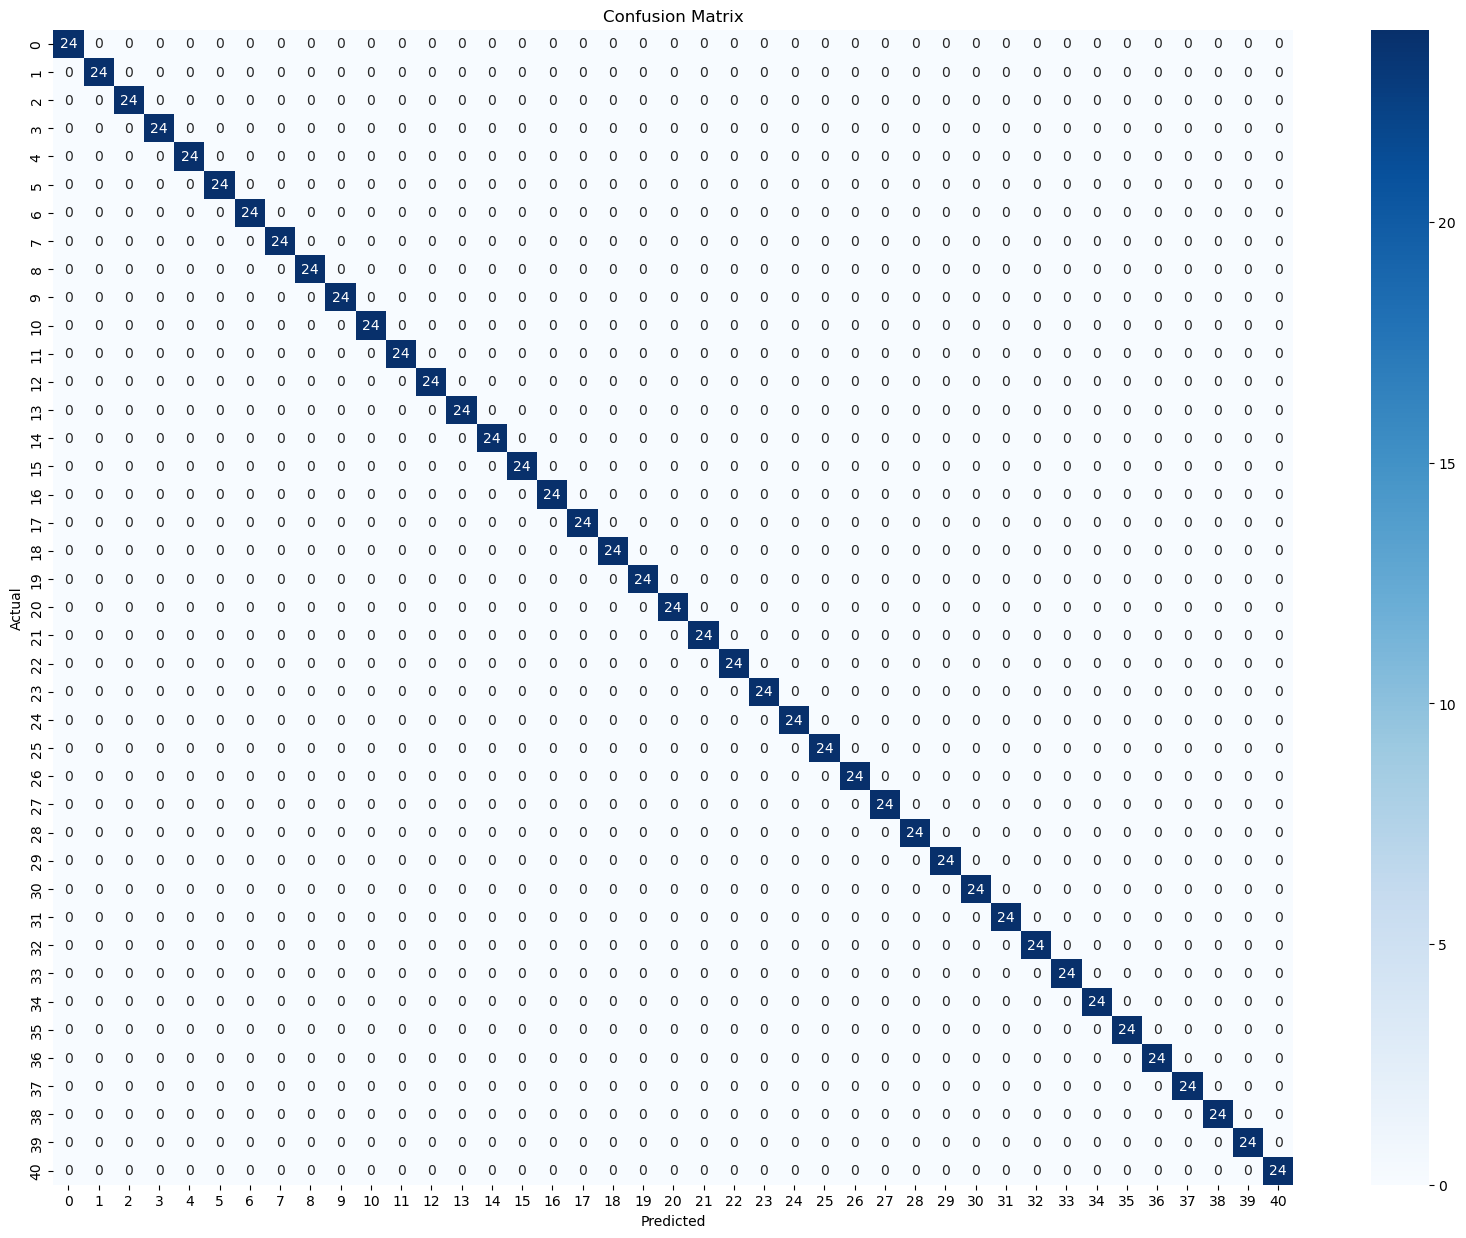

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
import seaborn as sns
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Accuracy: 1.00 ± 0.00


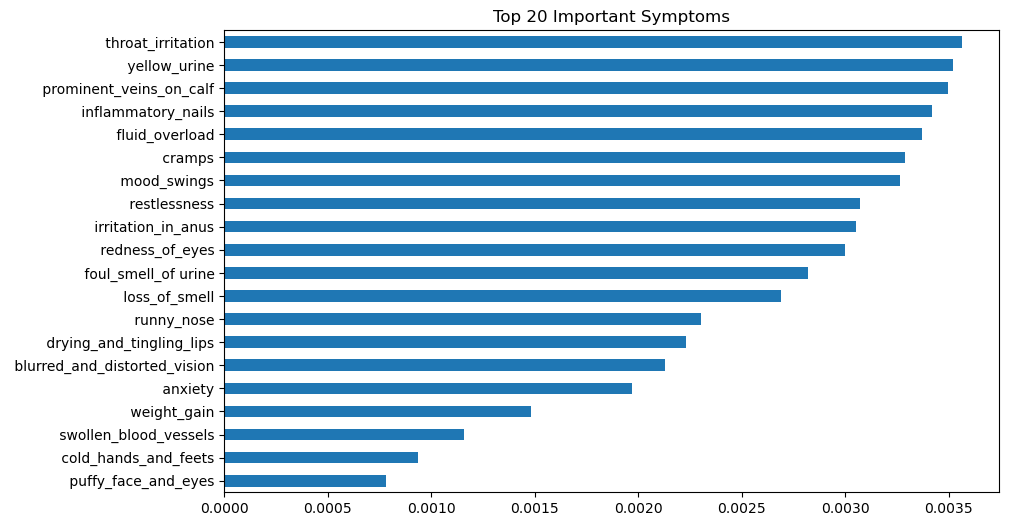

In [38]:
feature_importance = pd.Series(model.feature_importances_, index=symptom_names)
top_features = feature_importance.sort_values().head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 20 Important Symptoms')
plt.show()

<Figure size 2000x1500 with 0 Axes>

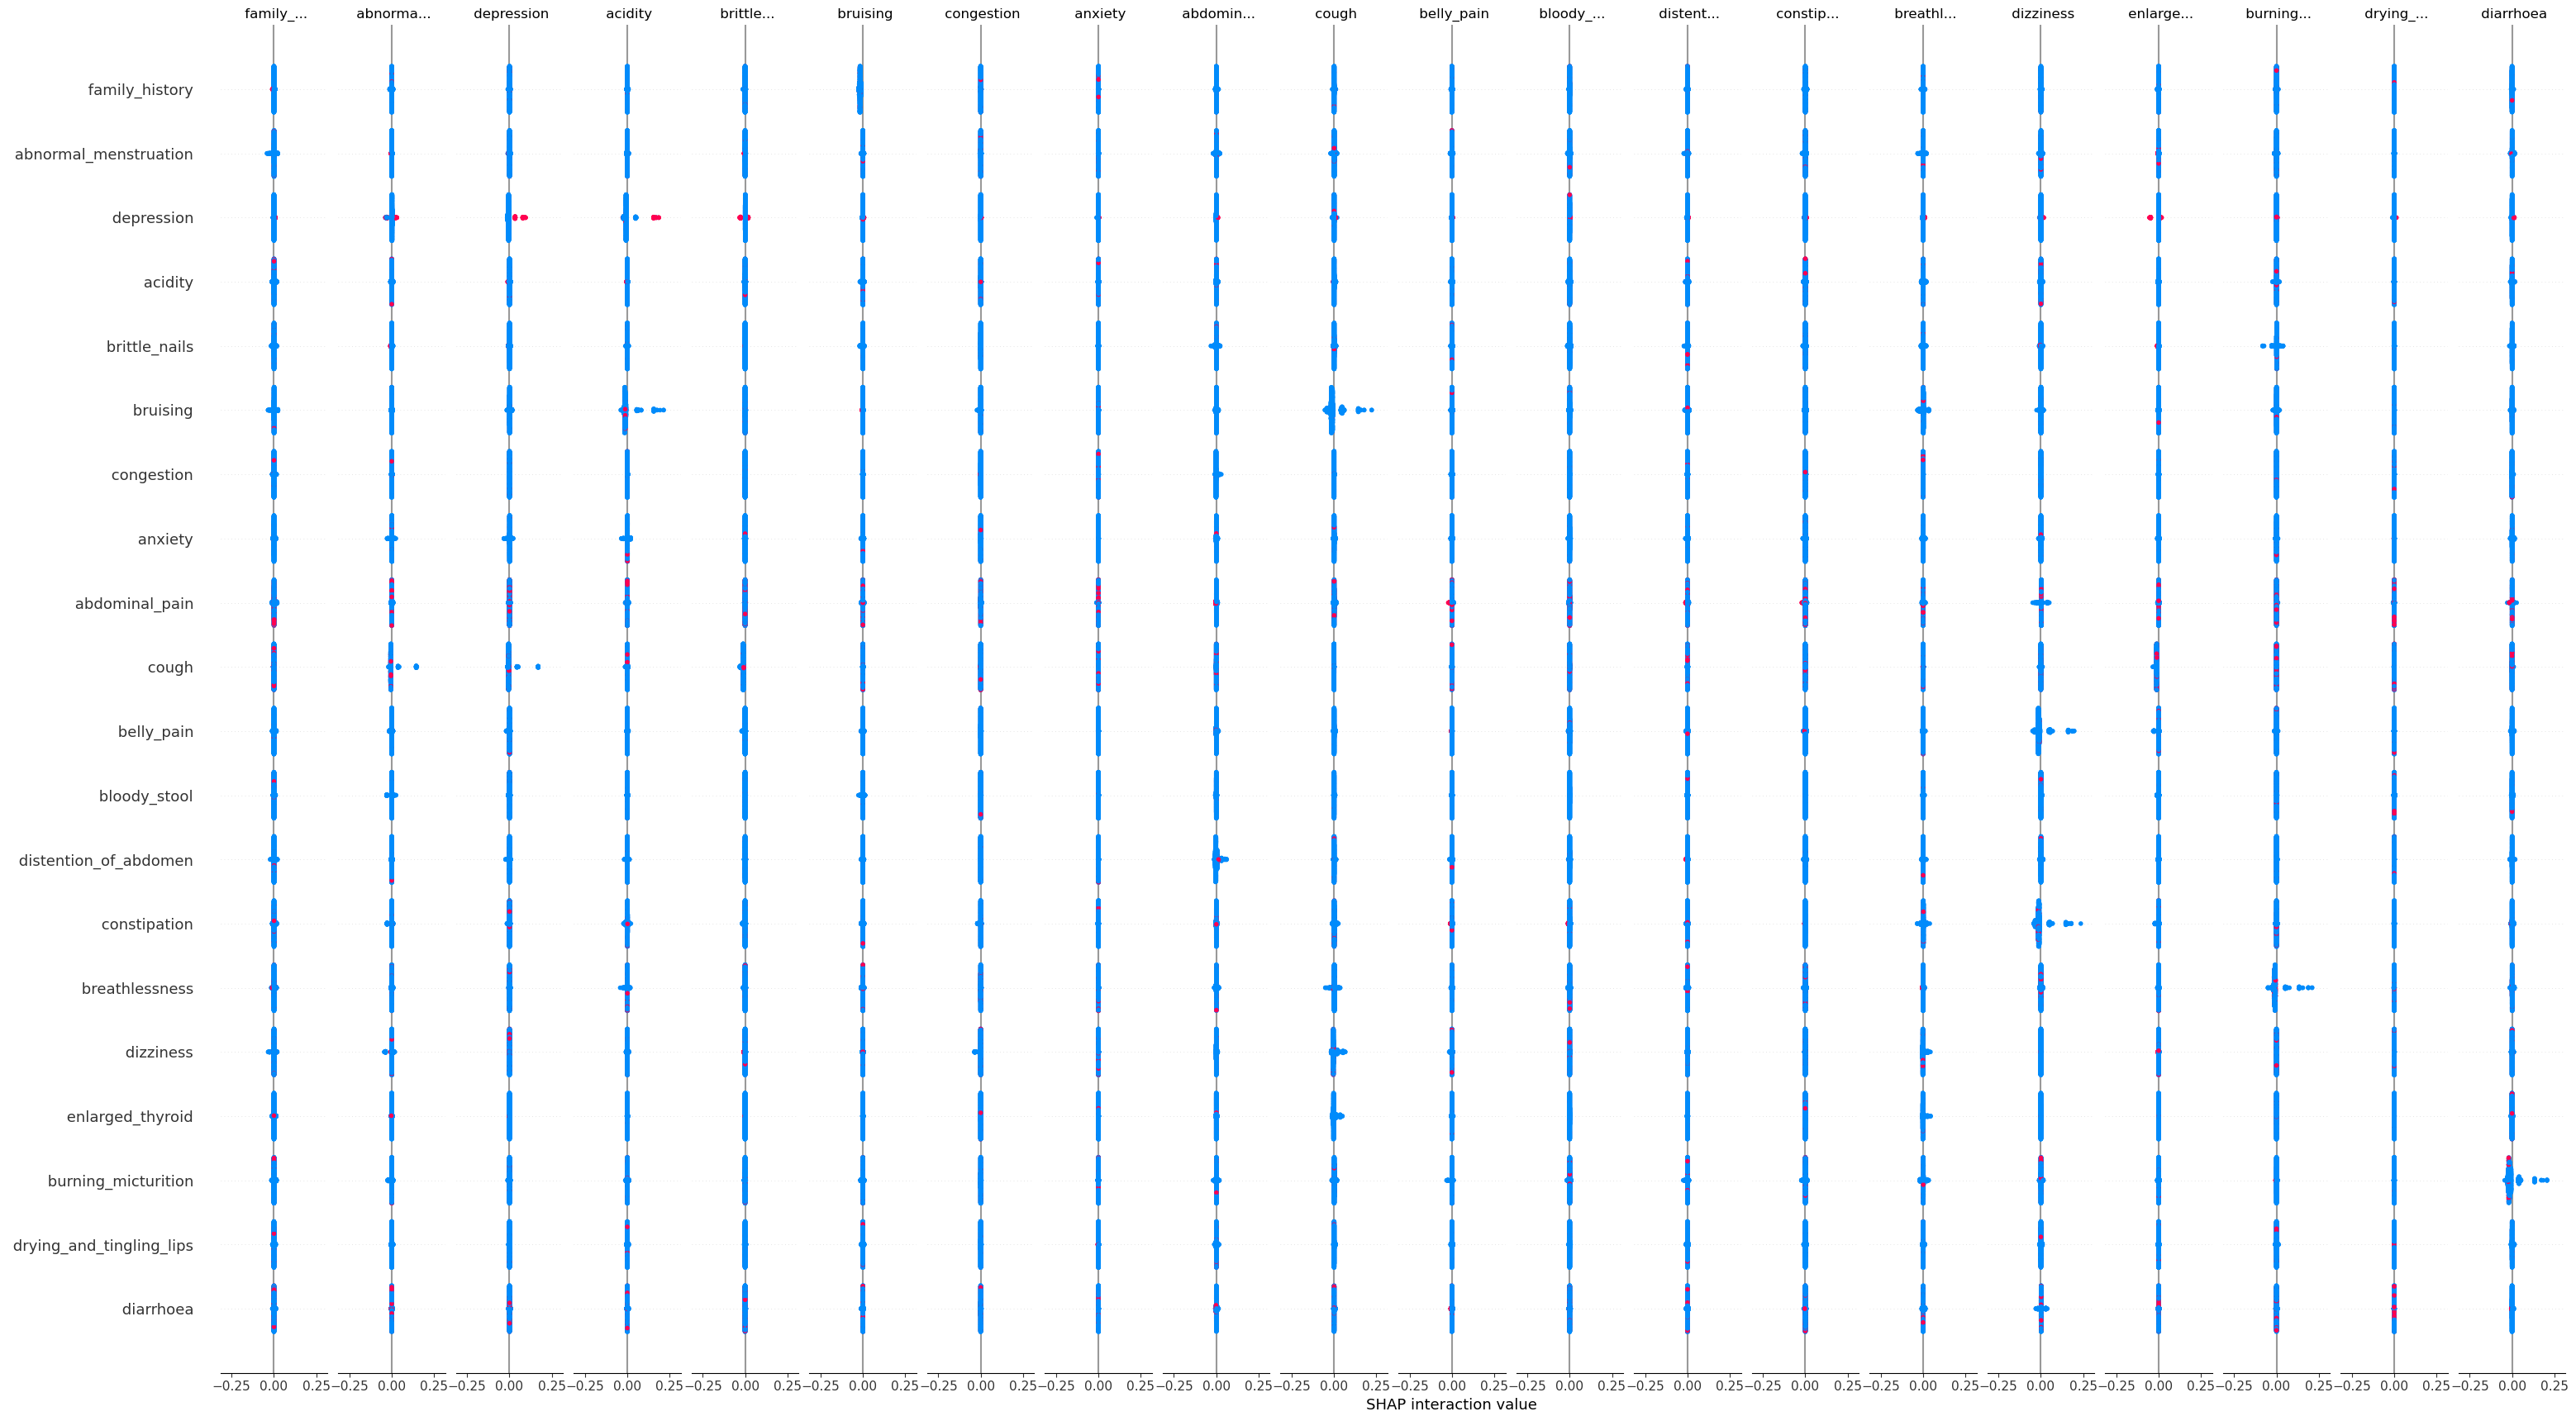

<Figure size 640x480 with 0 Axes>

In [36]:
import shap

# Explain model predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot summary
plt.figure(figsize=(20, 15))  # Increase figure size (width, height)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20, feature_names=symptom_names) #increase max display
plt.tight_layout() #avoid labels to be cut off.
plt.show()

<Figure size 2000x1500 with 0 Axes>

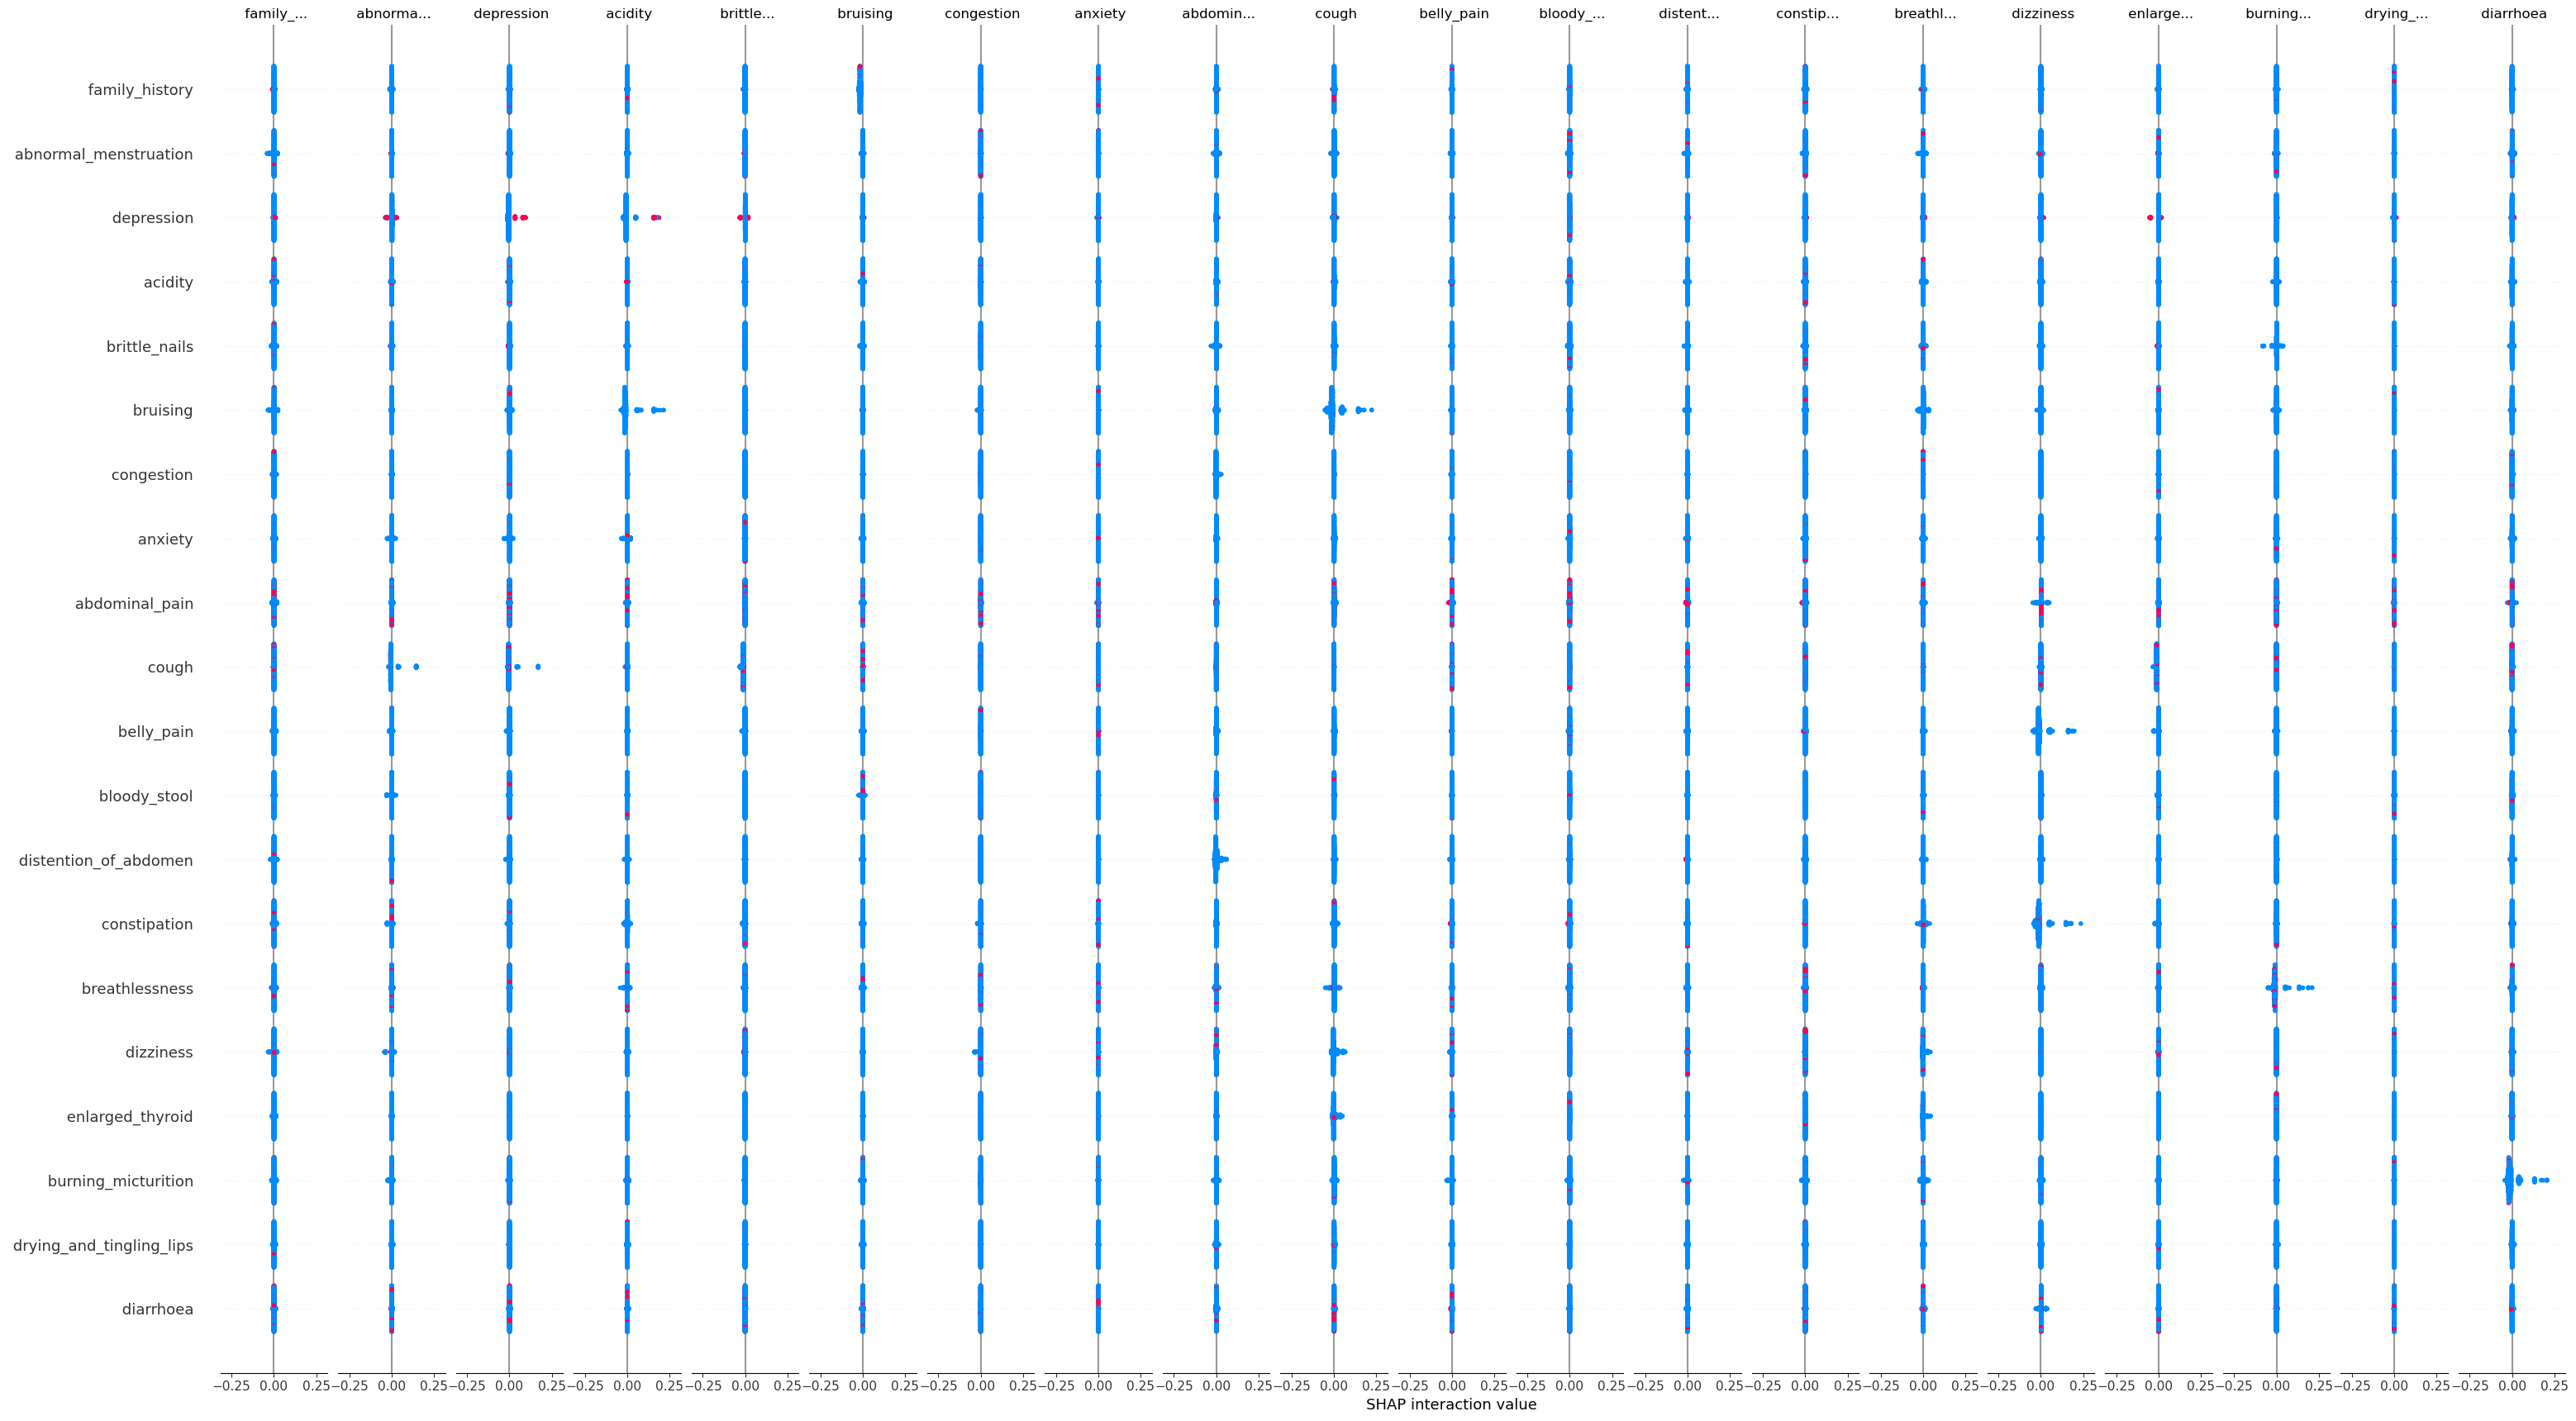

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 15)) 
shap.summary_plot(shap_values, X_test, max_display=20, feature_names=symptom_names)
plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'disease_predictor.pkl')
joblib.dump(mlb, 'symptom_encoder.pkl')
joblib.dump(le, 'disease_encoder.pkl')